In [4]:
from sklearn import datasets, svm, metrics
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
clf = svm.SVC()

In [7]:
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

In [8]:
x.shape

(70000, 28, 28)

In [9]:
x = x.reshape(70000, -1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.4, shuffle=False
)
#split data into test and train sets
#x = images, y = number values

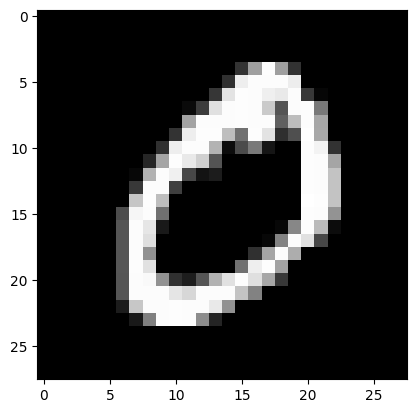

In [10]:
plt.imshow(X_train[1].reshape((28,28)) ,cmap = "gray") #28 arays of 28 characters

In [11]:
clf = pickle.load(open("../svm.sav", 'rb'))

In [12]:
X_test[10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 165,
       255, 254, 217,  38,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  17, 180,
       235, 253, 253, 253, 253, 106,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [119]:
# clf.fit(X_train, y_train) #training

SVC()

In [13]:
predicted = clf.predict(X_test[1002:1010]) #using the model

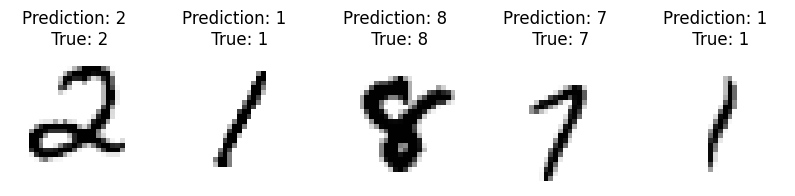

In [15]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, prediction, label in zip(axes, X_test[1002:1010], predicted, y_test[1002:1010]):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction} \n True: {label}")
#showing results

In [16]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test[1002:1010], predicted)}\n"
)

Classification report for classifier SVC():
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8




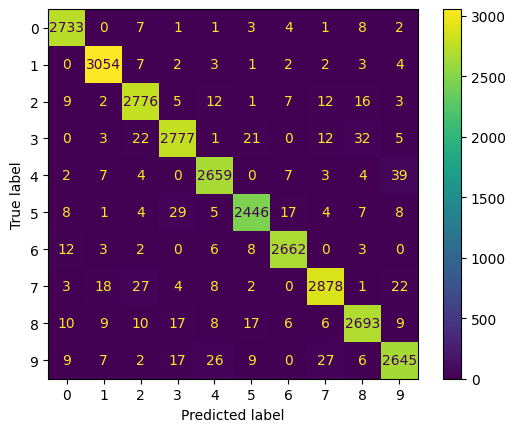

In [156]:
con_matrix = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=con_matrix)
disp.plot()

In [120]:
pickle.dump(clf, open("svm.sav", 'wb'))